# Datenanalyse: Klimadaten der NASA

Einige Libraries, die man fast immer für die Datenverarbeitung benötigt:

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
print('Setup Complete')

Setup Complete


## Einlesen von Klimadaten

Im Folgenden Nutzen wir globale Klimadaten, die auf der Webseite der NASA zu finden sind: https://data.giss.nasa.gov/gistemp/. Hierbei handelt es sich um Temperaturdaten, die Anomalien gegenüber dem Mittelwert in den Jahren 1951-1980 aufweisen.
Es werden Daten von Dateien (online oder offline) eingelesen mit der Python Bilbiothek `pandas`. Die Daten werden in sogenannten *DataFrames* gespeichert. 

In [2]:
#link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"
link = 'data/graph.csv'
global_mean = pd.read_csv(link, header = 1) 

Um das *DataFrame* auszugeben, können beispielsweise die ersten 5 Spalten ausgegeben werden:

In [3]:
global_mean.head(5) # Ausgabe der ersten 5 Spalten
#global_mean.tail(5) # Ausgabe der letzten 5 Spalten
#global_mean # Ausgabe des DataFrames 

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24


Einzelne Spalten kann man sich anzeigen lassen, indem den Namen des zugehörigen *DataFrames* nutzt:

In [4]:
global_mean['Year']

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
137    2017
138    2018
139    2019
140    2020
141    2021
Name: Year, Length: 142, dtype: int64

## Daten plotten

Zunächst wollen wir die beiden Spalten, No_Smoothing and Lowess(5) gegenüber der Zeitachse Year plotten. Hierfür benützen wir die Python Library `matplotlib`:

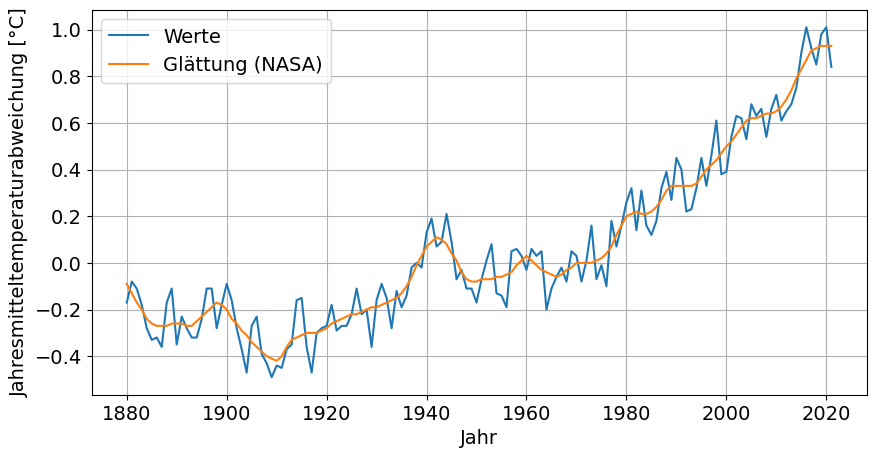

In [5]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14;
plt.plot(global_mean['Year'], global_mean['No_Smoothing'], label = 'Werte')
plt.plot(global_mean['Year'], global_mean['Lowess(5)'], label = 'Glättung (NASA)')
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();

## Daten verarbeiten
Die Bibliothek `pandas` ist sehr umfangreich und wird viel zur Datenverarbeitung genutzt. Im folgenden dazu einige Beispiele:

### Statistische Größen: Mittelwert, Standardabweichung, Min, Max

Für jede Spalte lassen sich statistische Größen wie z.B. die Anzahl der Einträge pro Spalte, deren Mittelwert, Standardabweichung, Minimal- und Maximalwert bestimmen:

In [6]:
global_mean.describe()

,Year,No_Smoothing,Lowess(5)
count,142.000000,142.000000,142.000000
mean,1950.500000,0.053169,0.053169
std,41.135953,0.364161,0.352324
min,1880.000000,-0.490000,-0.420000
25%,1915.250000,-0.200000,-0.227500
50%,1950.500000,-0.065000,-0.040000
75%,1985.750000,0.252500,0.235000
max,2021.000000,1.010000,0.930000


### Beispiel: Maximum und zugehöriges Jahr ausgeben

Dies können wir benutzen, um beispielsweise die *maximale Temperaturdifferenz* zu ermitteln:

In [7]:
global_mean["No_Smoothing"].max()

1.01

Wenn wir wissen wollen, *wann* diese *maximale Temperaturdifferenz* auftrat, muss der zugehörige Index dieses Events gespeichert werden:

In [8]:
index_max = global_mean["No_Smoothing"].idxmax()
print(index_max)

136


Diesen Index können wir nun benutzen, um mittels `.loc` Befehl den Eintrag zu diesem Index auszugeben:

In [9]:
global_mean.loc[index_max]

Year            2016.00
No_Smoothing       1.01
Lowess(5)          0.87
Name: 136, dtype: float64

### Beispiel: Daten aufsteigend/absteigend sortieren

Mit `.sort_values("Spaltenname")` können wir auch die Tabelle nach dem definierten Spaltennamen sortieren (standardmäßig in **ansteigender** Reihenfolge):

In [10]:
global_mean.sort_values("No_Smoothing")

,Year,No_Smoothing,Lowess(5)
29,1909,-0.49,-0.41
24,1904,-0.47,-0.31
37,1917,-0.47,-0.30
31,1911,-0.45,-0.40
30,1910,-0.44,-0.42
...,...,...,...
135,2015,0.90,0.83
137,2017,0.92,0.91
139,2019,0.98,0.93
140,2020,1.01,0.93


Mit `ascending=False` wird absteigend sortiert:

In [11]:
global_mean.sort_values("No_Smoothing", ascending = False)

,Year,No_Smoothing,Lowess(5)
140,2020,1.01,0.93
136,2016,1.01,0.87
139,2019,0.98,0.93
137,2017,0.92,0.91
135,2015,0.90,0.83
...,...,...,...
30,1910,-0.44,-0.42
31,1911,-0.45,-0.40
24,1904,-0.47,-0.31
37,1917,-0.47,-0.30


**WICHTIG**: Der Dataframe `global_mean` wird dadurch nicht verändert, es handelt sich nur um eine Anzeige!

## Daten glätten

Die von der NASA verwendete Glättung ist die **LO**cally **WE**ighted **S**catter-plot **S**moother (LOWESS). Dabei wird in einem lokal zu definierenden Bereich eine lineare Regression durchgeführt. Eine genauere Erklärung zur Methode findet ihr auf [Youtube](https://youtu.be/b7oryuMP3r8).

Es gibt natürlich viele Methoden und Filter, um Daten zu glätten. Wir wollen nun versuchen, die Methode der NASA zu rekonstruieren. Hierfür benutzen wir die Python Library `statsmodels` und erstellen eine weitere Spalte `Lowess(own)` in unserem DataFrame `global_mean`. In diese Spalte schreiben wir die geglätteten Werte von den Rohdaten `global_mean["No_Smoothing"]` indem wir die Funktion `lowess`aufrufen. Details zu Nutzung der Funktion findet ihr [https://www.statsmodels.org](https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html):
- an erster Stelle in der Funktion werden die Y-Werte eingegeben, hier `global_mean["No_Smoothing"]`
- an zweiter Stelle in der Funktion werden die X-Werte eingegeben, hier `global_mean["Year"]`
- die Option `frac` ist eine Zahl zwischen 0 und 1. Dies ist der Anteil der Daten, der bei der Schätzung der einzelnen y-Werte verwendet wird. 
- Ausgegeben wird zweidimensionalas Array. Die erste Spalte enthält die sortierten x-Werte und die zweite Spalte die zugehörigen geschätzten y-Werte. Um die zweite Spalte in den DataFrame zu speichern, wählen wir diese mit `[:,1]` aus.

In [12]:
from statsmodels.nonparametric.smoothers_lowess import lowess
global_mean["Lowess(own)"] = lowess(global_mean["No_Smoothing"],global_mean["Year"], frac=1/14)[:,1]

In [13]:
global_mean

,Year,No_Smoothing,Lowess(5),Lowess(own)
0,1880,-0.17,-0.09,-0.092698
1,1881,-0.08,-0.13,-0.129873
2,1882,-0.11,-0.17,-0.167172
3,1883,-0.18,-0.20,-0.203172
4,1884,-0.28,-0.24,-0.239029
...,...,...,...,...
137,2017,0.92,0.91,0.911976
138,2018,0.85,0.92,0.921410
139,2019,0.98,0.93,0.926072
140,2020,1.01,0.93,0.929365


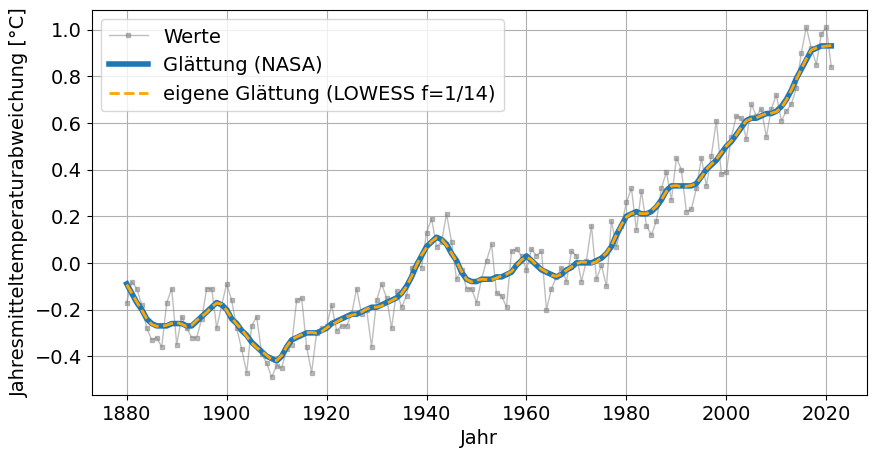

In [14]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.plot(global_mean["Year"],global_mean["Lowess(own)"],ls="--",lw=2,  color="orange", label="eigene Glättung (LOWESS f=1/14)");
plt.legend();
plt.grid();

Die Verwendung des *rollenden Mittelwertes* hat das Problem, dass dabei immer Werte fehlen (Anfang/Ende). Die gewählten gewählten Parametern für das LOWESS liefern ähnliche Ergebnisse im Vergleich zur Original Glättung der NASA.

## Daten bereinigen

Beim [Umweltbundesamt](https://www.umweltbundesamt.de/daten/klima/trends-der-lufttemperatur#2020-bisher-zweitwarmstes-jahr-in-deutschland) gibt es aktuelle Zahlen zur Erwärmung der Luftemperatur in Deutschland. Die Werte befinden sich in [dieser Exceltabelle](https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/3-bis-8_abb-tab_tmt_2021-05-12.xlsx), welche mit dem Befehl `pd.read_excel()` eingelesen werden kann, wobei hierbei der Name des ExcelSheets und die verwendenten Spaltennummern angegeben werden können. Allerdings liegen in diesem Datenset einige Messpunkte nicht vor, wie wir gleich bei der Ausgabe des DataFrames sehen werden:

In [15]:
link = "https://www.umweltbundesamt.de/sites/default/files/medien/384/bilder/dateien/3-bis-8_abb-tab_tmt_2021-05-12.xlsx"
GER_mean = pd.read_excel(link,sheet_name="3_DWD",usecols=[1,19]) # einlesen
GER_mean.columns=["Jahr","Jahresmitteltemperatur [°C]"]
GER_mean

HTTPError: HTTP Error 404: Not Found

Es fällt auf, dass an einigen Stellen Datenpunkte fehlen (wie sollte es auch anders sein in Deutschland...). Bevor die Daten weiter verarbeitet werden können, müssen Sie daher bereinigt werden um die `NaN` zu entfernen, und die Jahreszahlen als *Integer* definiert werden:

In [16]:
GER_mean.dropna(inplace=True) # Zeilen mit "NaN" Werte entfernt und DataFrame wird gespeichert (!) 
GER_mean["Jahr"] = GER_mean["Jahr"].astype(int) # Spalte "Jahr" als integer definieren
GER_mean

,Jahr,Jahresmitteltemperatur [°C]
1,1881,7.3352
2,1882,8.3661
3,1883,7.9099
4,1884,8.5892
5,1885,7.7726
...,...,...
136,2016,9.5000
137,2017,9.6000
138,2018,10.5000
139,2019,10.3000


## Temperaturabweichung berechnen

Für die Daten aus Deutschland müssen noch die Temperaturabweichungen zum Mittelwert zwischen 1881 und 1910 berechnet werden, damit sie zu dem anderen Datensatz vergleichbar sind und einem Diagramm geplottet werden können. Im folgenden berechnen wir:
- bis zum Jahr 1910 den Mittelwert mit der Funktion `.mean()`, und zwar von allen Jahresmitteltemperatur-Werten `GER_mean["Jahresmitteltemperatur [°C]"]`, die vor 1911 aufgenommen worden sind. Diesen Mittelwert über die Jahre 1881-1910 speichern wir in `GER_mean1881_1910`.
- die Differenz zwischen Jahresmitteltemperatur und dem eben berechneten Mittelwert und erhalten somit die Jahresmitteltemperaturabweichung, welche wir in eine neue Spalte des DataFrames schreiben, `GER_mean["Jahresmitteltemperaturabweichung [°C]"]`

In [17]:
# Temperaturabweichung berechnen (Abweichung von Mittelwert der Temperatur zwischen 1881 und 1900)
GER_mean1881_1910 = GER_mean.loc[GER_mean["Jahr"] <= 1910,"Jahresmitteltemperatur [°C]"].mean()
GER_mean["Jahresmitteltemperaturabweichung [°C]"] = GER_mean["Jahresmitteltemperatur [°C]"] - GER_mean1881_1910
GER_mean

,Jahr,Jahresmitteltemperatur [°C],Jahresmitteltemperaturabweichung [°C]
1,1881,7.3352,-0.482663
2,1882,8.3661,0.548237
3,1883,7.9099,0.092037
4,1884,8.5892,0.771337
5,1885,7.7726,-0.045263
...,...,...,...
136,2016,9.5000,1.682137
137,2017,9.6000,1.782137
138,2018,10.5000,2.682137
139,2019,10.3000,2.482137


## Temperaturantstieg mittels Linearer Regression bestimmen

Mittels linearer Regression kann der Temperaturanstieg aus den Daten berechnet werden. Hierfür wird die Python Library `numpy` benutzt und die Funktion `polyfit` aufgerufen und in als `model` gespeichert. Diese Funktion benutzt die Least-Square Methode für polynomische Modelle. Weitere Informationen zu der Funktion finder ihr [hier](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). 

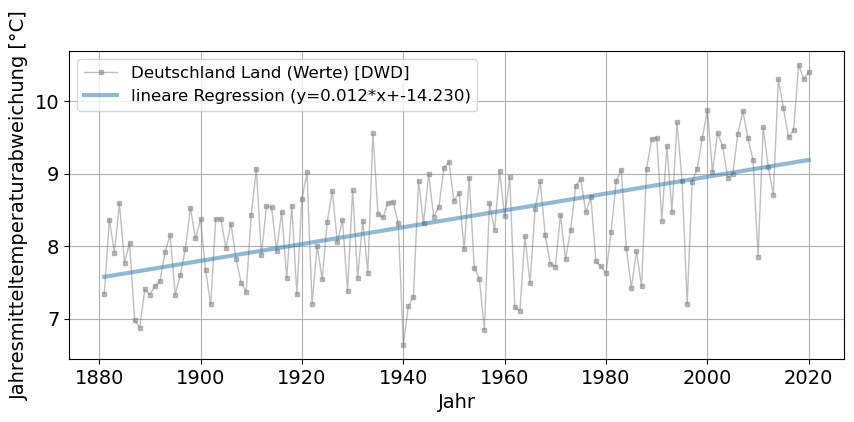

In [18]:
import numpy as np
import pandas as pd

x=GER_mean["Jahr"]
y=GER_mean["Jahresmitteltemperatur [°C]"]
model = np.polyfit(x, y, 1) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0]*x+model[1]

plt.style.use('default')
plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.plot(GER_mean["Jahr"],GER_mean["Jahresmitteltemperatur [°C]"], ls="-", lw=1,marker="s", ms=3, color="gray",alpha=0.5, label="Deutschland Land (Werte) [DWD]");
plt.plot(x,y_model, ls="-", lw=3, color="tab:blue",alpha=0.5, label=f"lineare Regression (y={model[0]:.3f}*x+{model[1]:.3f})");
plt.legend(fontsize=12);
plt.grid();

In [19]:
print(f"Temperaturanstieg pro Jahr (von 1981 bis 2020): {model[0]:.3f}°C/Jahr")
print(f"Temperaturanstieg seit Beginn der Messung: {(y_model.iloc[-1]-y_model.iloc[0]):.3f}°C")

Temperaturanstieg pro Jahr (von 1981 bis 2020): 0.012°C/Jahr
Temperaturanstieg seit Beginn der Messung: 1.611°C


**Vorsicht**: Die lineare Regression bezieht hier den ganzen Zeitraum mit ein, betrachten wir für den Temperaturgradienten nur die Daten von 1980 bis 2020:

In [20]:
x=GER_mean.loc[GER_mean["Jahr"] >= 1980,"Jahr"]
y=GER_mean.loc[GER_mean["Jahr"] >= 1980,"Jahresmitteltemperatur [°C]"]
model = np.polyfit(x, y, 1) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0]*x+model[1]
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0]:.3f}°C/Jahr")

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.045°C/Jahr


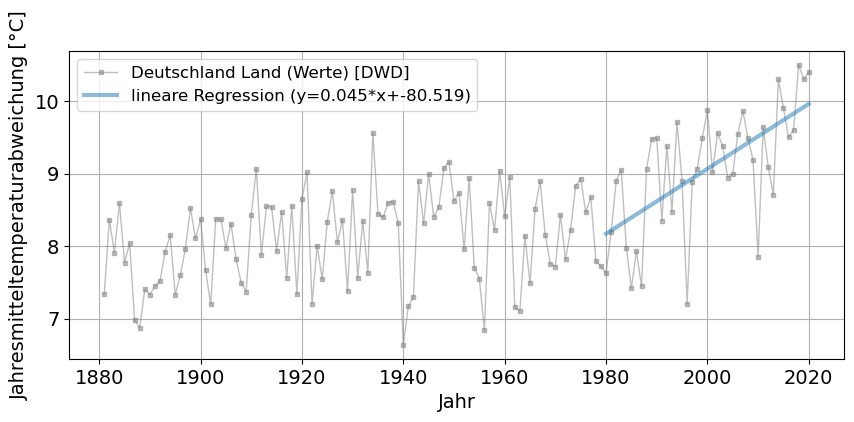

In [21]:
plt.style.use('default')
plt.figure(figsize=(10,4))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.plot(GER_mean["Jahr"],GER_mean["Jahresmitteltemperatur [°C]"], ls="-", lw=1,marker="s", ms=3, color="gray",alpha=0.5, label="Deutschland Land (Werte) [DWD]");
plt.plot(x,y_model, ls="-", lw=3, color="tab:blue",alpha=0.5, label=f"lineare Regression (y={model[0]:.3f}*x+{model[1]:.3f})");
plt.legend(fontsize=12);
plt.grid();

## **Aufgaben**

### Aufgabe 1: Daten aus Deutschland glätten und plotten

Glätte die Daten aus Deutschland, die im letzten Abschnitt bereits bereinigt wurden. Hierfür sollen lediglich die *Abweichungen* der Jahresmitteltemperaturen betrachtet werden (also das, was eben berechnet wurde). Stelle  anschließend die Abweichungswerte zusammen mit den geglätteten Werten grafisch dar und beschrifte das Diagramm entsprechend. 

In [22]:
# Berechnung der geglätteten Daten und Speichern im DataFrame:
from statsmodels.nonparametric.smoothers_lowess import lowess
GER_mean["Lowess(own)"] = lowess(GER_mean["Jahresmitteltemperaturabweichung [°C]"],GER_mean["Jahr"], frac=1/14)[:,1]
GER_mean

,Jahr,Jahresmitteltemperatur [°C],Jahresmitteltemperaturabweichung [°C],Lowess(own)
1,1881,7.3352,-0.482663,0.208028
2,1882,8.3661,0.548237,0.179543
3,1883,7.9099,0.092037,0.132242
4,1884,8.5892,0.771337,0.070696
5,1885,7.7726,-0.045263,-0.005329
...,...,...,...,...
136,2016,9.5000,1.682137,2.021745
137,2017,9.6000,1.782137,2.172035
138,2018,10.5000,2.682137,2.314417
139,2019,10.3000,2.482137,2.461835


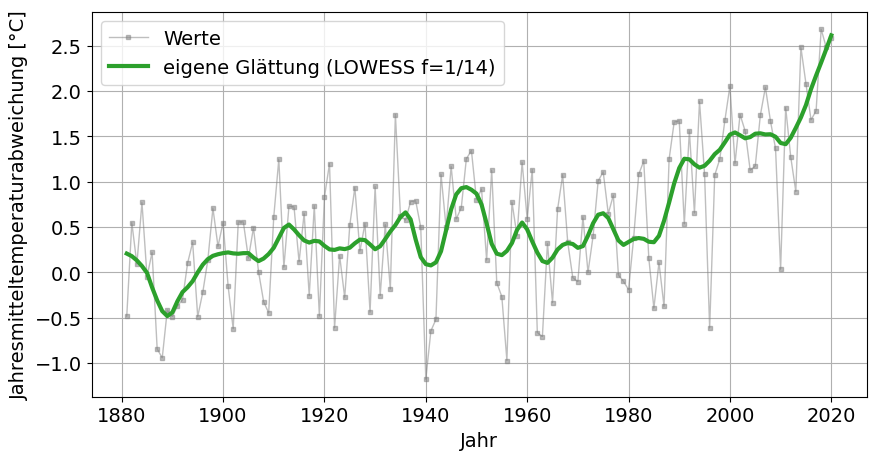

In [23]:
# Grafische Darstellung der Daten und Glättung aus Deutschland:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.plot(GER_mean["Jahr"],GER_mean["Jahresmitteltemperaturabweichung [°C]"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(GER_mean["Jahr"],GER_mean["Lowess(own)"],ls="-",lw=3,  color="tab:green", label="eigene Glättung (LOWESS f=1/14)");
plt.legend();
plt.grid();

### Aufgabe 2: Daten zur getrennten Betrachtung von Land- und Ozeanerwärmung

Unter diesem Link [https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv](https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv) findest du die Messdaten für die Erwärmung an Landoberfläche und an der Ozeanoberfläche. Lese die Daten in ein DataFrame `global_mean_sep` ein und stelle sie grafisch dar. Beschrifte das Diagramm entsprechend!

In [24]:
#link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Temperature_Anomalies_over_Land_and_over_Ocean/graph.csv"
link = 'data/graph_land_ocean.csv'
global_mean_sep = pd.read_csv(link, header = 1) 

In [25]:
global_mean_sep

,Year,Land_Annual,Lowess(5),Ocean_Annual,Lowess(5).1
0,1880,-0.61,-0.50,-0.05,0.01
1,1881,-0.41,-0.54,0.01,-0.02
2,1882,-0.50,-0.57,0.00,-0.06
3,1883,-0.60,-0.61,-0.06,-0.09
4,1884,-0.78,-0.64,-0.15,-0.12
...,...,...,...,...,...
137,2017,1.36,1.33,0.64,0.64
138,2018,1.20,1.35,0.60,0.64
139,2019,1.40,1.37,0.68,0.63
140,2020,1.56,1.39,0.67,0.63


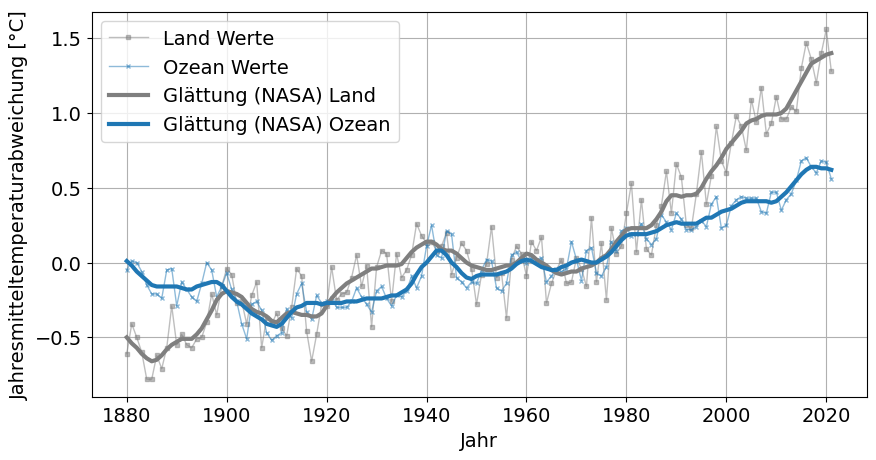

In [26]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14;
plt.plot(global_mean_sep["Year"],global_mean_sep["Land_Annual"], lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Land Werte");
plt.plot(global_mean_sep["Year"],global_mean_sep["Ocean_Annual"], lw= 1, marker="x", ms=3, color="tab:blue", alpha=0.5, label="Ozean Werte");
plt.plot(global_mean_sep["Year"],global_mean_sep["Lowess(5)"], ls="-", lw=3,  color="tab:gray", label="Glättung (NASA) Land");
plt.plot(global_mean_sep["Year"],global_mean_sep["Lowess(5).1"], ls="-", lw=3,  color="tab:blue", label="Glättung (NASA) Ozean");
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.legend();
plt.grid();

### Aufgabe 3: Vergleich der Datensets

Stell folgende Daten zusammen dar:
- global: Land+Ozean (geglättet) <- NASA
- global: Land (geglättet) <- NASA
- Deutschland: Land (Werte) <- DWD (Deutscher Wetterdienst)
- Deutschland: Land (geglättet) <- DWD (Deutscher Wetterdienst)

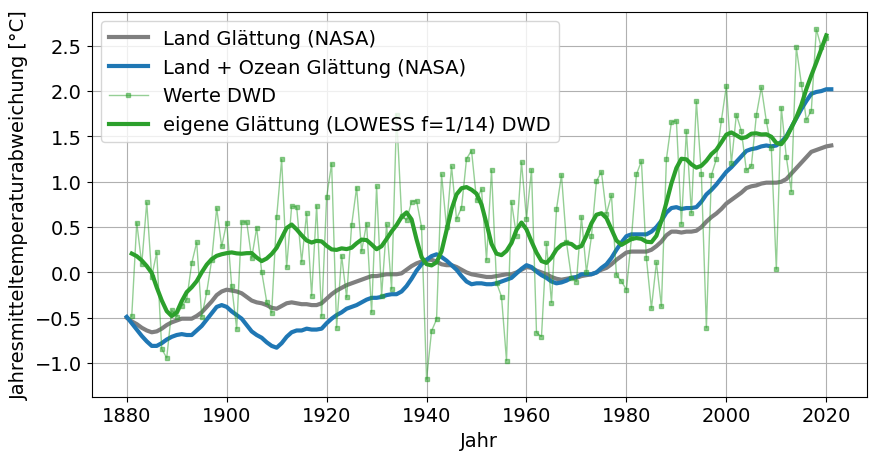

In [27]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14;
plt.plot(global_mean_sep["Year"],global_mean_sep["Lowess(5)"], ls="-", lw=3,  color="tab:gray", label="Land Glättung (NASA) ");
plt.plot(global_mean_sep["Year"],global_mean_sep["Lowess(5).1"] + global_mean_sep["Lowess(5)"], ls="-", lw=3,  color="tab:blue", label="Land + Ozean Glättung (NASA) ");
plt.plot(GER_mean["Jahr"],GER_mean["Jahresmitteltemperaturabweichung [°C]"], ls="-", lw=1, marker="s", ms=3, color="tab:green", alpha=0.5, label="Werte DWD");
plt.plot(GER_mean["Jahr"],GER_mean["Lowess(own)"],ls="-",lw=3,  color="tab:green", label="eigene Glättung (LOWESS f=1/14) DWD");
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.legend();
plt.grid();

### Aufgabe 4: Vergleich der Grafik mit Leopoldina

Vergleichen wir diese Darstellung nun mal mit einer aus dem [Factsheet der Leopoldina](https://doi.org/10.26164/leopoldina_03_00327):

Nationale Akademie der Wissenschaften Leopoldina (2021): Klimawandel: Ursachen,
Folgen und Handlungsmöglichkeiten. Halle (Saale).

![](FactSheetLeopoldina_TempGer.png)

Hierbei wurde scheinbar eine sehr starke Glättung der Messdaten verwendet.
Erhöhe also den Wert `frac` für die LOWESS Methode für beide Messsätze `global_mean`(NASA) und `GER_mean` (Deutscher Wetterdienst) und prüfe, ob wir in ähnliche Bereiche kommen. Gib ebenfalls den Temperaturanstieg über die letzten 40 Jahre an (mittels linearer Regression). 

In [50]:
# Glättung:
from statsmodels.nonparametric.smoothers_lowess import lowess
GER_mean["Lowess(own3)"] = lowess(GER_mean["Jahresmitteltemperaturabweichung [°C]"],GER_mean["Jahr"], frac=1/3)[:,1]
GER_mean_Lowess_own3_mean_until_1910 = GER_mean.loc[GER_mean["Jahr"] <= 1910,"Jahresmitteltemperaturabweichung [°C]"].mean()
GER_mean["Lowess(own3)"] = GER_mean["Lowess(own3)"] - GER_mean_Lowess_own3_mean_until_1910

global_mean["Lowess(own3)"] = lowess(global_mean["No_Smoothing"],global_mean["Year"], frac=1/3)[:,1]
global_mean["Lowess(own3)"] = global_mean["Lowess(own3)"]

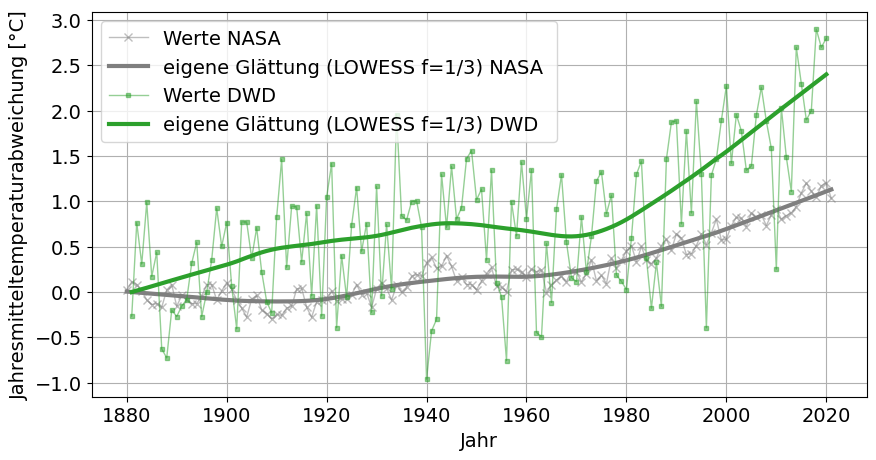

In [52]:
# Grafische Darstellung:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 14;
plt.plot(global_mean["Year"],global_mean["No_Smoothing"]-global_mean["Lowess(own3)"][1], ls="-", lw=1,  color="tab:gray", alpha=0.5, marker="x", label="Werte NASA ");
plt.plot(global_mean["Year"],global_mean["Lowess(own3)"]-global_mean["Lowess(own3)"][1], ls="-", lw=3,  color="tab:gray", label="eigene Glättung (LOWESS f=1/3) NASA ");
plt.plot(GER_mean["Jahr"],GER_mean["Jahresmitteltemperaturabweichung [°C]"]-GER_mean["Lowess(own3)"][1], ls="-", lw=1, marker="s", ms=3, color="tab:green", alpha=0.5, label="Werte DWD");
plt.plot(GER_mean["Jahr"],GER_mean["Lowess(own3)"]-GER_mean["Lowess(own3)"][1],ls="-",lw=3,  color="tab:green", label="eigene Glättung (LOWESS f=1/3) DWD");
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.legend();
plt.grid();

In [53]:
x=GER_mean.loc[GER_mean["Jahr"] >= 1980,"Jahr"]
y=GER_mean.loc[GER_mean["Jahr"] >= 1980,"Jahresmitteltemperatur [°C]"]
model = np.polyfit(x, y, 1) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0]*x+model[1]
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0]:.3f}°C/Jahr")

x=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
model = np.polyfit(x, y, 1) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0]*x+model[1]
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0]:.3f}°C/Jahr")

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.045°C/Jahr
Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.019°C/Jahr
